# Colab Setup

In [1]:
# Check GPU availability
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)


(True, 'NVIDIA A100-SXM4-40GB')

In [2]:
# Remove old clone
import os, shutil

repo_name = "ANeurIPS2024_SPV-MIA"
if os.path.basename(os.getcwd()) == repo_name:
    %cd ..
if os.path.exists(repo_name):
    print(f"Removing existing {repo_name}...")
    shutil.rmtree(repo_name)

# Clone fork
!git clone https://github.com/maidesu/ANeurIPS2024_SPV-MIA.git
%cd ANeurIPS2024_SPV-MIA


Cloning into 'ANeurIPS2024_SPV-MIA'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 47 (delta 11), reused 11 (delta 8), pack-reused 25 (from 1)
Receiving objects: 100% (47/47), 638.38 KiB | 30.40 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/ANeurIPS2024_SPV-MIA


In [3]:
!pip install -q -r requirements-colab.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Target Model Fine-tuning

In [4]:
# Launch fine-tuning test using gpt2 and small wikitext-2-raw-v1 slice
!accelerate launch ./ft_llms/llms_finetune.py \
--output_dir ./ft_llms/gpt2/wikitext/target/ \
--block_size 128 --eval_steps 100 --save_epochs 100 --log_steps 100 \
-d wikitext -m gpt2 --packing --use_dataset_cache \
-e 2 -b 2 -lr 1e-4 --gradient_accumulation_steps 1 \
--train_sta_idx=0 --train_end_idx=2000 --eval_sta_idx=0 --eval_end_idx=500 \
--dataset_config_name wikitext-2-raw-v1


The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-04-08 16:54:04.110321: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 16:54:04.128714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744131244.150637    2508 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register 

# Self-prompt Reference Model Fine-tuning

In [5]:
!accelerate launch ./ft_llms/refer_data_generate.py \
-tm ./ft_llms/gpt2/wikitext/target/ \
-m gpt2 -d wikitext \
--dataset_config_name wikitext-2-raw-v1


Streaming output truncated to the last 5000 lines.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
tensor(3.1173, device='cuda:0', grad_fn=<NllLossBackward0>)
 75% 5093/6758 [1:29:42<32:03,  1.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
tensor(3.3757, device='cuda:0', grad_fn=<NllLossBackward0>)
 75% 5094/6758 [1:29:43<32:23,  1.17s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
tensor(2.8940, device='cuda:0', grad_fn=<NllLossBackward0>)
 75% 5095/6758 [1:29:44<32:35,  1.18s/it]The attention mask and the pad token id were not set. As a consequence, 

In [9]:
!accelerate launch ./ft_llms/llms_finetune.py --refer \
--output_dir ./ft_llms/gpt2/wikitext/refer/ \
--block_size 128 --eval_steps 100 --save_epochs 100 --log_steps 100 \
-d wikitext -m gpt2 --packing --use_dataset_cache \
-e 2 -b 2 -lr 5e-5 --gradient_accumulation_steps 1 \
--train_sta_idx=0 --train_end_idx=2000 --eval_sta_idx=0 --eval_end_idx=500 \
--dataset_config_name wikitext-2-raw-v1


The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-04-08 19:30:00.981216: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 19:30:00.999709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744140601.021544   40827 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register 

# Run SPV-MIA

In [16]:
!python attack.py

2025-04-08 19:50:58.689646: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 19:50:58.706841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744141858.727991   46295 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744141858.734377   46295 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-08 19:50:58.755222: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

<ipython-input-25-147477788afa>:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {np.round(np.trapz(tpr, fpr), 4)})')


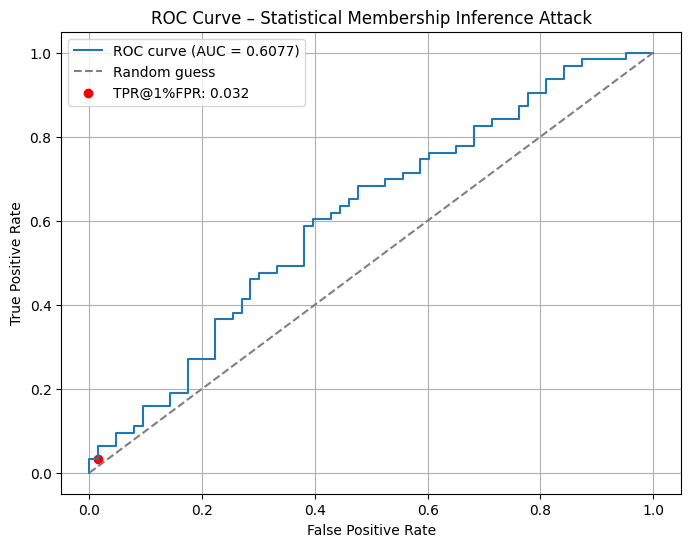

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load ROC curve data
data = np.load("./cache/wikitext/wikitext-2-raw-v1/attack_data_gpt2@wikitext/roc_stat.npz")
fpr = data["fpr"]
tpr = data["tpr"]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {np.round(np.trapz(tpr, fpr), 4)})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Statistical Membership Inference Attack")
plt.legend()
plt.grid(True)

# Mark TPR@1%FPR
fpr_1_index = np.argmin(np.abs(fpr - 0.01))
plt.scatter(fpr[fpr_1_index], tpr[fpr_1_index], color='red', label=f'TPR@1%FPR: {tpr[fpr_1_index]:.3f}')
plt.legend()

# Save the figure
plt.savefig("roc_stat.png", dpi=300)
plt.show()
